Jack Nealon and Ryder Gallagher  
CPSC 222 - Dr. Gina Sprint - Gonzaga University  
12/6/2022

# Quantified Group Project - Music Streaming 
In this report, we are going to analyze Jack's Spotify streaming data with Ryder's Apple streaming data for the past year and calculate statistics from the information. Included in this report, we are able to read in the history, clean it by replacing missing values, categorizing information, and adding additional supplemental information. From this we are then able to calcuate our statistcs and present them visually using tables and graphs.
1. Load the data
2. Clean the data
3. Visualize the data

### 1. Load the Data -----

In [86]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib
importlib.reload(utils) #reloads the kernal automatically

#Read in the raw, unprocessed data into a pandas dataframe
jack_df, ryder_df = utils.read_files()

Information Collected for Jack Includes:
1. Date and Time (string)
1. Artist (string)
1. Track Name (string)
1. Seconds Played (float)


Ryder's data : last.fm/api
Information Collected for Ryder Includes:
1. artist (string)
1. streamable (bool)
1. image (string)
1. mbid (string)
1. album (string)
1. name (string)
1. url (string)
1. date (string)

Struggles:

* We both had json but the last.fm format was a lot more complicated and we had a lot of trouble getting it to work because we went through the last.fm api to get the data
* Originally with Ryder's data the API said there was a limit of 200 instances per page, but we tried plugging in 1000 instances and it worked (1001 did not however)

### 2. Clean the Data -----

In [87]:
jack_df = utils.clean_jack_info(jack_df)
ryder_df = utils.clean_ryder_info(ryder_df)

What are we cleaning: 
1. Splitting columns with multiple values into separate columns (and deleting the combined column we extracted values from)
1. Filling all missing values with the np.nan value
1. Converting values to more understandable units

Information Collected for Jack after cleaning:
1. Year (integer)
1. Month (integer)
1. Day (integer)
1. Time of playing (string)
1. Artist (string)
1. Track Name (string)
1. Seconds Played (float)

Information Collected for Ryder after cleaning:
1. Artist (string)
1. Album (string)
1. Track Name (string)
1. Day (integer)
1. Month (integer)
1. Year (integer)

### 3. Aggregate the data and compute summary statistics -----

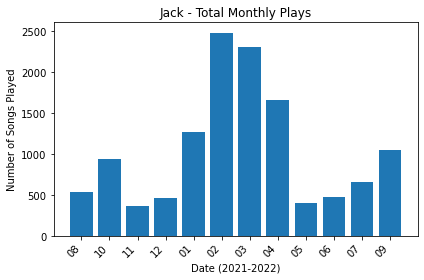

In [88]:
utils.graph_jack_monthly_plays(jack_df)

This graph shows the total number of songs/podcast plays ranging from the beginning of Jack's data (August 2021) to the end of my data (September 2022). Its interesting because we can see the trend of listening to a lot of music from december to january and february before slowly stopping listening to as much music. Jack's music habits then drop after april 2022 and slowly increasing from there. Its pretty cool because November 2021 was when Jack switched from the Silver Falls Brewery to The Noble Fox. We can see that he learned without music before taking over and running on autopilot before his leave at around april. We can see what Jack was doing and can correlate it to his real-life events :D.  

Hollywood Undead                              291
Akintoye                                      194
Skillet                                       170
iamjakehill                                   165
Jakey                                         142
Black Veil Brides                             141
Shotgun Willy                                 140
Barns Courtney                                136
Andrew Schulz's Flagrant with Akaash Singh    128
Three Days Grace                              126
Name: artistName, dtype: int64


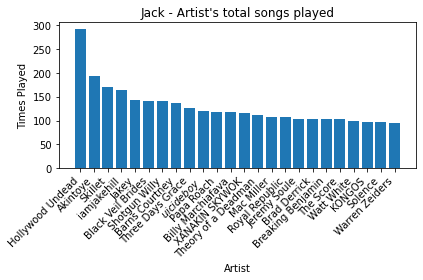

In [89]:
utils.graph_jack_favorite_artists(jack_df)

This is a lot of Hollywood Undead. Jack didnt even go through a phase or a noticeable time where he was playing a crap ton of hollywood undead, the same with iamjakehill. This is weird, even Jack didnt know what his most played music was but it looks like he's an emo boy. If I had to make a list having never seen these numbers, I would probably identify probably 10-12 listed which is hilarious. 

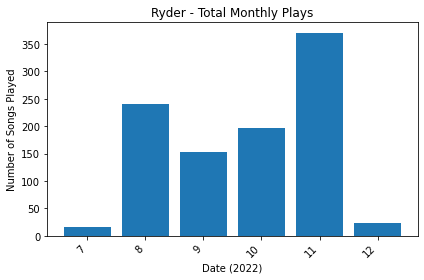

In [90]:
utils.graph_ryder_monthly_plays(ryder_df)

This data shows how many songs Ryder listened to from July 2022 - the beginning of December 2022. Ryder listened to barely anything in July (even the first week of December had more songs listened to).

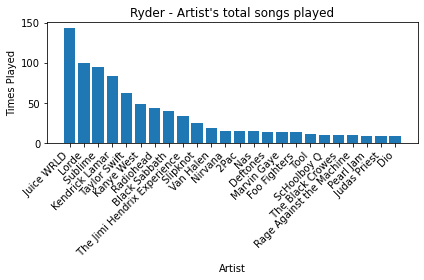

In [91]:
utils.graph_ryder_favorite_artists(ryder_df)

Here Ryder listened to a lot of Juice WRLD, don't worry he's okay. The kanye listens were before *that* interview. Once you get past the most listened to artist, it plateaus and they all have similar numbers.

### Hypothesis Testing -----

Question: On average, did Jack listen to more songs per month than Ryder? 

* Step 1: State the null and alternate hypothesis:
    * $H_0$: $JackMonthlyAverage \leq RyderMonthlyAverage$
    * $H_1$: $JackMonthlyAverage > RyderMonthlyAverage$

* Step 2: Select the level of significance:
    * $\alpha = 0.025$

* Step 3: Select the appropriate test statistic:
    * two independent samples --> ttest_ind()
    * $t=\frac{\overline{X_1} - \overline{X_2}}{\sqrt{s_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$


* Step 4: Formulate decision rule:
    * First, let’s find the critical value:
        * Since it's a one tailed test, go to Level of Significance for one-tailed test (alpha = 0.025) in the table. 
        * With df ~10 instances @ .025 significance; we find t = 2.228
        * If t-computed is > 2.228, then Reject $H_0$.
        * If t-computed is <= 2.228, then Reject $H_1$.

In [92]:
jack_avg_df, ryder_avg_df = utils.get_both_monthly_avgs(jack_df, ryder_df)
t, pval = stats.ttest_ind(jack_avg_df['avg'], ryder_avg_df['avg'])
pval /= 2
print(t, pval)
alpha = .025
if pval < alpha:
    print("---> Reject H0")
else:
    print("---> DO NOT reject H0")

2.8527333110442408 0.005757825313033366
---> Reject H0


* Step 5: Make a decision:
    * Because our t-computed is greater than our t-critical we reject our $H_0$ and accept our $H_1$
    * We can say with confidence that Jack listened to more monthly songs than Ryder.
    * We can confirm this by looking at manual calculation for the average number of songs played by month: 

In [93]:
print("Jack Average: ", round(jack_avg_df['avg'].mean(),2), "\nRyder Average:", round(ryder_avg_df['avg'].mean(),2))

Jack Average:  1051.42 
Ryder Average: 166.67


### Decision Trees -----

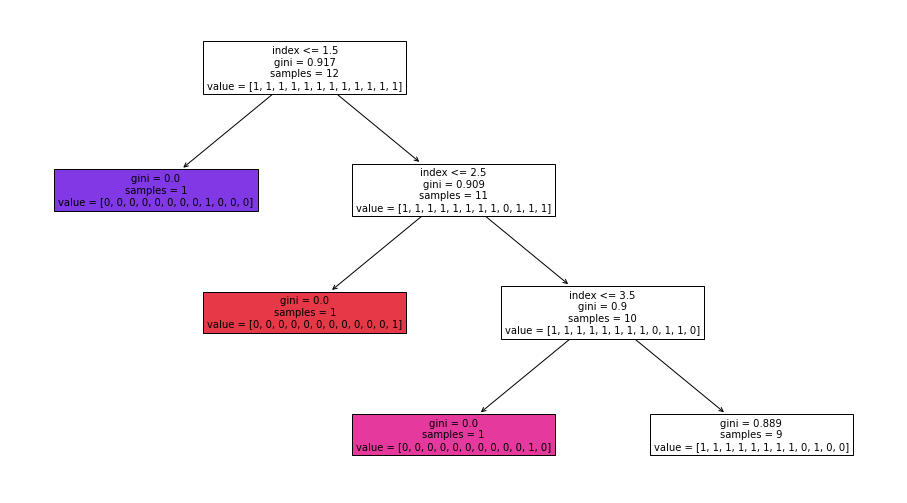

In [94]:
utils.get_decision_tree(jack_avg_df)

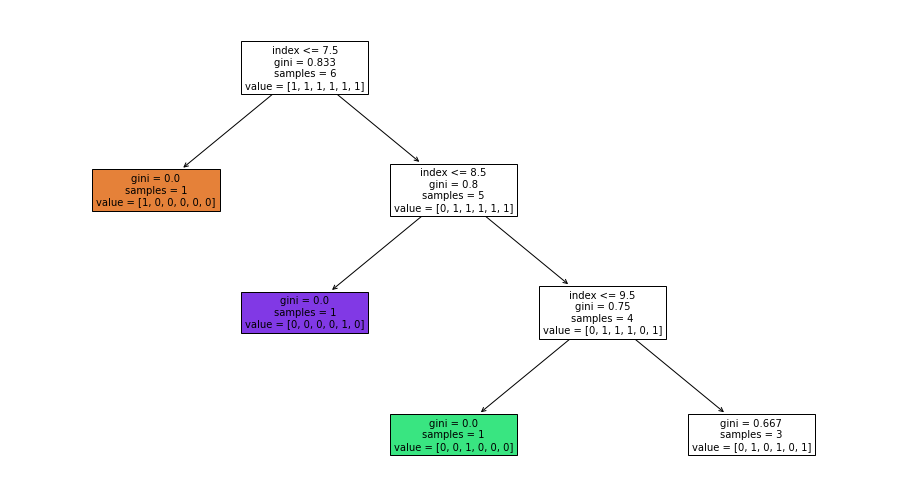

In [95]:
utils.get_decision_tree(ryder_avg_df)

### kNN Calculations -----

In [96]:
utils.get_kNN(jack_avg_df)
utils.get_kNN(ryder_avg_df)

Prediction:  [1662]
Prediction:  [153]


c:\Users\Jack\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jack\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


kNN Calculations Conclusion:
* Because we are working with limited data we are not able to make a very good prediction. Since we're trying to predict the number of songs based on the month and considering that we only have one value for each month, we dont have the best dataset for this question. If we were able to gather more information we could train our classifier to make a better prediction. 

### Save spotify information to csv file -----

In [97]:
jack_df.to_csv("JackCleanedData.csv")
ryder_df.to_csv("RyderCleanedData.csv")

Remember to save your cleaned data so that you never have to clean it again!